In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [16]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_992.csv')#Put address
nfp_992=pd.read_csv('neuralfp.csv')
nfp_992=np.array(nfp_992)
print(len(nfp_992))
Charge=input[['Charge_acid']].copy()
Isomer=input[['Isomer']].copy()
X_992=np.concatenate((nfp_992,Charge),axis=1)
X_992=np.concatenate((X_992,Isomer),axis=1)
#X_785=col_normalize(X_785)
X_992.shape
# X_992

992


(992, 1026)

In [17]:
#assign the Hammett constants to Y
Y_992=input[['Hammett Constant']].copy()
Y_992=np.array(Y_992)

In [18]:
nfp_ndonor=pd.read_csv('neuralfp_ndonor.csv')
nfp_ndonor=np.array(nfp_ndonor)
X_ndonor=nfp_ndonor
X_ndonor.shape

(10, 1026)

In [19]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((992,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((992,1000),dtype=float)
Y_target_train=np.zeros((992,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [20]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [21]:
for m in range(0,1000):
    #positive part
    index_992=np.random.choice(992, size=992, replace=1)
    X_train=X_992[index_992]
    Y_train=Y_992[index_992]
    X_test=np.delete(X_train,index_992,axis=0)
    Y_test=np.delete(Y_train,index_992,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_992)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [22]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.81830000e-01,  4.02000000e-02,  6.18900000e-02, -3.32270000e-01,
       -3.59500000e-01,  3.95780000e-01,  4.66180000e-01,  3.07030000e-01,
        1.66680000e-01,  5.40650000e-01,  5.74540000e-01,  7.14820000e-01,
        7.66170000e-01,  3.12040000e-01,  3.23940000e-01,  3.14380000e-01,
        3.17280000e-01,  4.61540667e-01,  5.15296667e-01,  1.94430000e-01,
        1.05440000e-01,  4.10950000e-01,  4.43620000e-01,  3.92920000e-01,
        4.88850000e-01,  4.16380000e-01,  4.79790000e-01,  4.97803333e-01,
        5.14543333e-01,  3.13130000e-01,  3.29596667e-01,  4.64280000e-01,
        5.24620000e-01,  3.50500000e-02, -3.53100000e-02,  1.53733333e-01,
        1.51227143e-01, -8.45600000e-02, -1.23300000e-01, -7.27100000e-02,
       -1.43060000e-01, -5.17600000e-02,  1.75550000e-01, -1.32970000e-01,
        1.51611667e-01,  1.48925833e-01,  1.89910000e-01,  1.73440000e-01,
        4.99650000e-02, -6.92400000e-02,  1.48350000e-01,  1.39471667e-01,
        1.32502381e-01,  

In [23]:
Y_prediction_mean[170]

-0.4512500000000001

In [24]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.04724141, 0.10477671, 0.11505272, 0.28530851, 0.25006389,
       0.13986562, 0.13678453, 0.22940375, 0.30323749, 0.06569686,
       0.07558431, 0.14787484, 0.16383721, 0.09505808, 0.11567142,
       0.11829123, 0.13483843, 0.11056078, 0.10333807, 0.13425675,
       0.15035893, 0.08734871, 0.10939879, 0.07122411, 0.08943477,
       0.07386539, 0.0789117 , 0.09981476, 0.11193973, 0.09144454,
       0.10725941, 0.09071208, 0.0983222 , 0.09886656, 0.12598613,
       0.14930899, 0.15827788, 0.0911351 , 0.08059473, 0.07449266,
       0.1023359 , 0.09588275, 0.14881565, 0.10473337, 0.15308968,
       0.16530651, 0.06697232, 0.08043734, 0.11812207, 0.15939894,
       0.1506955 , 0.1592    , 0.13363348, 0.14208552, 0.1555119 ,
       0.18240557, 0.21300067, 0.2468623 , 0.09246483, 0.12660845,
       0.14781062, 0.15561412, 0.1292106 , 0.13873542, 0.0705964 ,
       0.06099862, 0.14936771, 0.16549239, 0.20416978, 0.2542848 ,
       0.25042202, 0.08568616, 0.09792255, 0.09561556, 0.10272

In [25]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [26]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_992)
MSE_all

0.003582637802866575

In [27]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,        NC,            N,           NCF3,       NNO2")
Y_ndonor_mean

        NOC,        NC,            N,           NCF3,       NNO2


array([ 0.03495   , -0.20976867,  0.39229   ,  0.3565    ,  0.30293   ,
        0.251995  ,  0.27433167,  0.47367   ,  0.62333   ,  0.53817   ])

In [28]:
# print("  NOC,        NC,         N,           NCF3,       NNO2,     imidazole_OC")
# print(Y_ndonor_mean)

In [29]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.28293674, 0.33677111, 0.43000913, 0.36722302, 0.46046142,
       0.36145324, 0.2401309 , 0.3454334 , 0.18424226, 0.17586003])

In [34]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address
ndonor.T

array([[ 0.03495   ,  0.28293674],
       [-0.20976867,  0.33677111],
       [ 0.39229   ,  0.43000913],
       [ 0.3565    ,  0.36722302],
       [ 0.30293   ,  0.46046142],
       [ 0.251995  ,  0.36145324],
       [ 0.27433167,  0.2401309 ],
       [ 0.47367   ,  0.3454334 ],
       [ 0.62333   ,  0.18424226],
       [ 0.53817   ,  0.17586003]])

In [30]:
# sigma2=Y_ndonor_std*2.03/(1000**0.5)
# sigma2

In [31]:
pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 992 data points')

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


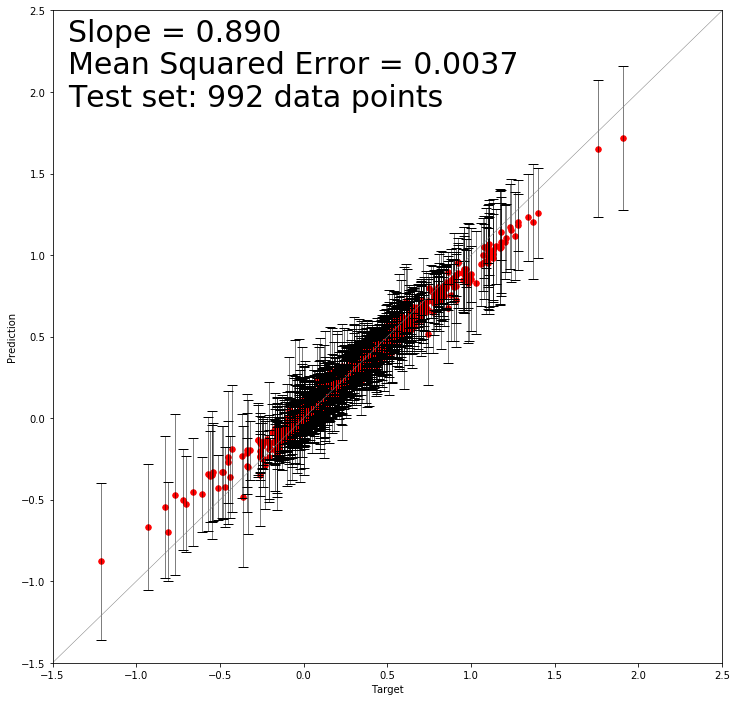

In [33]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.890', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()